# Lecture 2: Binomial Trees in Option Pricing

## Create a plot for PDF and realword data

In [7]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf 

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

In [12]:
# Download data for GBPUSD and store as csv file
gbpusd = yf.download('GBPUSD=X')
gbpusd.to_csv('GBPUSD.csv')

[*********************100%***********************]  1 of 1 completed


In [14]:
# Create a dataframe
df = pd.read_csv('/Users/baobach/CQF_notes/pythonlab/GBPUSD.csv', index_col=0, parse_dates=True, dayfirst=False)['2011':'2023']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0
...,...,...,...,...,...,...
2023-06-28,1.274454,1.275136,1.260827,1.274470,1.274470,0
2023-06-29,1.264127,1.266592,1.259256,1.264254,1.264254,0
2023-06-30,1.261495,1.272621,1.260144,1.261464,1.261464,0


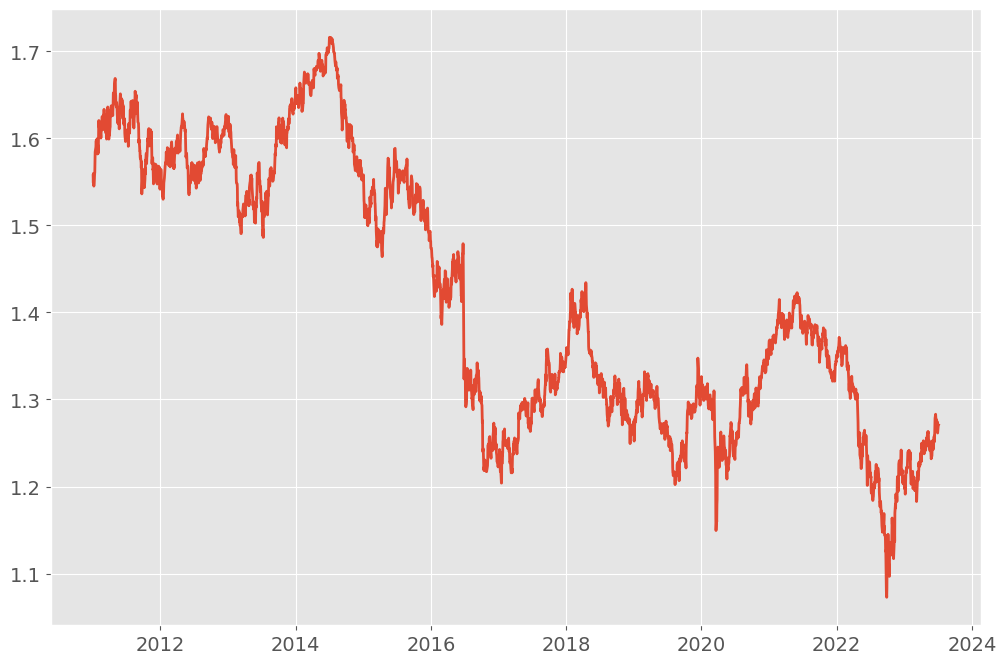

In [16]:
# Visualized data
plt.plot(df.index, df['Adj Close']);

In [17]:
# Calculate return
df['Return'] = df['Adj Close'].pct_change().fillna(0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0,0.000000
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0,-0.005313
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0,0.006988
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0,-0.005507
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0,-0.003940


In [19]:
# Calculate Mean & Sigma
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])

mu,sigma

(-4.643346071236652e-05, 0.005648684667463958)

In [20]:
# Calcucalte scaled return (z_value)
## Look at lambda function
df['Scale_Return'] = df['Return'].apply(lambda x: (x-mu)/sigma)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scale_Return
Date,,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0,0.000000,0.008220
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0,-0.005313,-0.932348
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0,0.006988,1.245295
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0,-0.005507,-0.966651
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0,-0.003940,-0.689286


In [26]:
# Calculate bin range
sr_min = np.min(df['Scale_Return'])
sr_max = np.max(df['Scale_Return'])

sr_min, sr_max

(-13.453038402099494, 5.455837003977836)

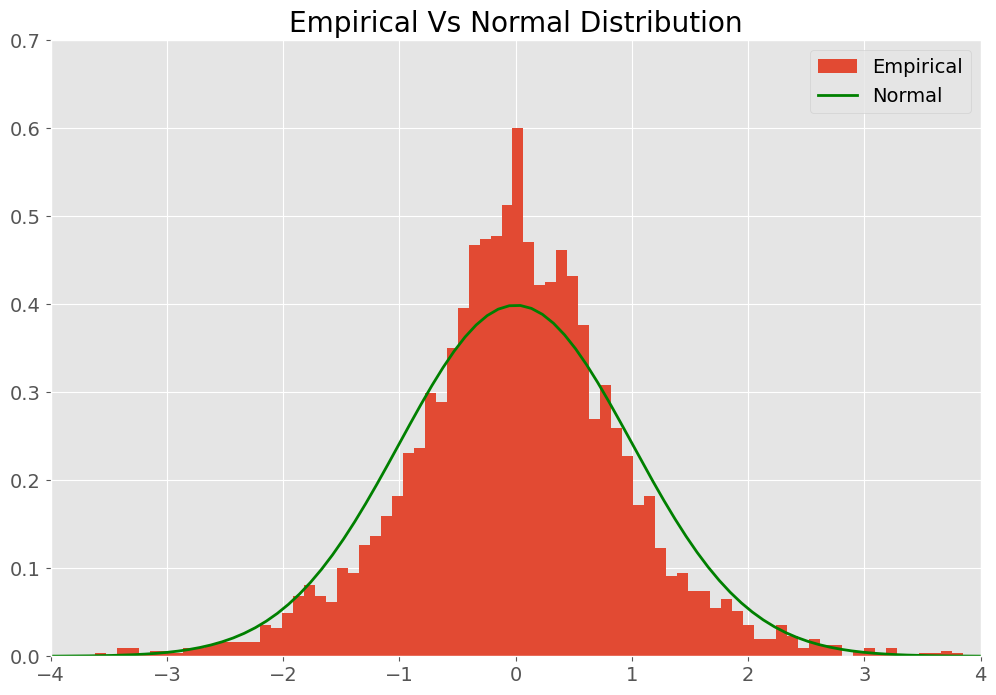

''

In [31]:
# Define bins - x
x = np.linspace(sr_min,sr_max,200)

# Calculate normal probability density function 
## Rewatch Dr. Paul lecture
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))

# Plot the scaled returns
plt.hist(df['Scale_Return'], bins=200, density=True, label='Empirical')

# Plot normal pdf
plt.plot(x,y, color='green', label='Normal')

# Title
plt.title('Empirical Vs Normal Distribution')

# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.7)


# Set legends
plt.legend()
plt.show()

;

## Binominal Tree

In [35]:
# Import helper
from numpy import *
from helper import plot_asset_path, plot_probability, plot_binomial_tree

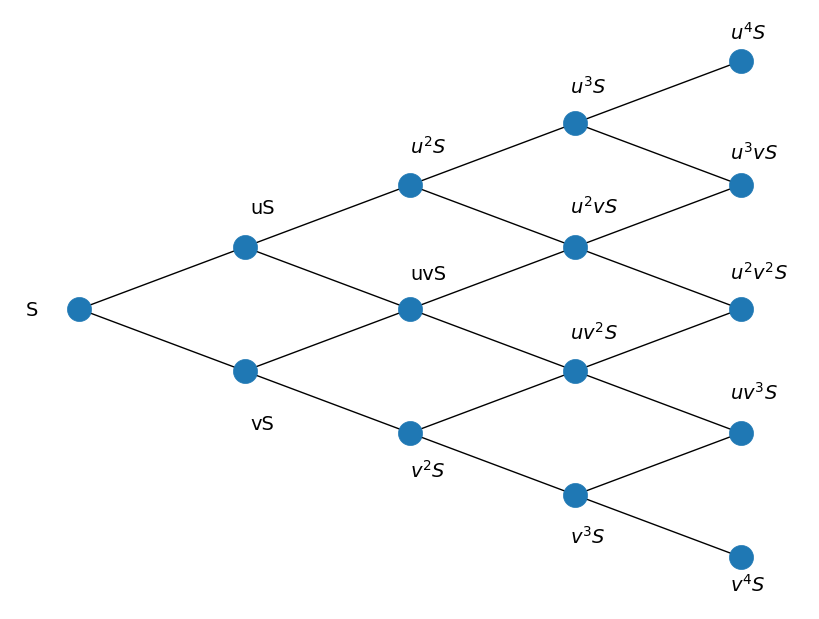

In [36]:
# Plot asset path
plot_asset_path()

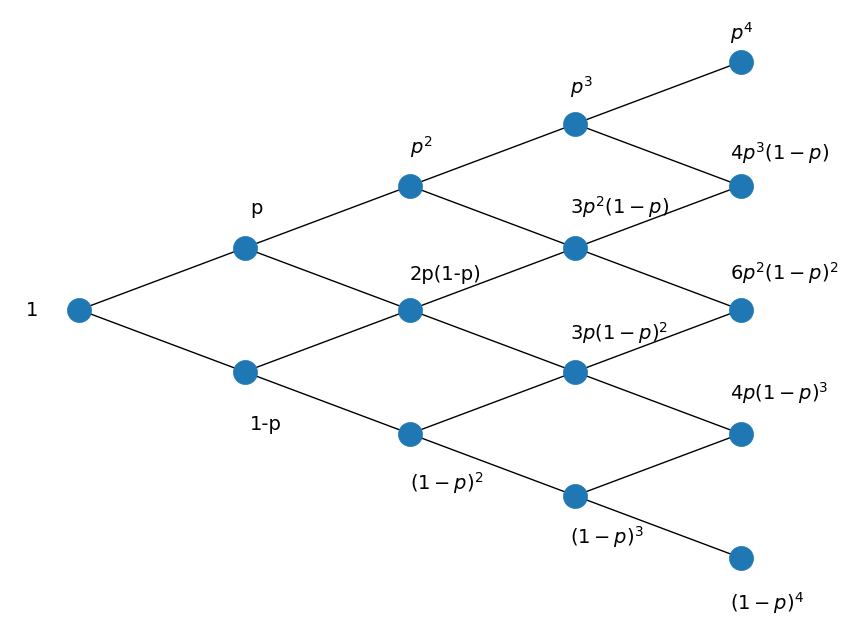

In [37]:
# Plot node probability
plot_probability()

In [38]:
# Building the function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    
    """

    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff
    Params
    ------
    spot        int or float    - spot price
    strike      int or float    - strike price
    rate        float           - interest rate
    sigma       float           - volatility
    time        int or float    - expiration time
    steps       int             - number of trees
    output      int             - [0: price, 1: payoff, 2: option value, 3: option delta]
    Returns
    -------
    out: ndarray
    An array object of price, payoff, option value and delta specified by the output parameter 
    
    """

    # params
    ts = time/steps
    u = 1+sigma*sqrt(ts)
    v = 1- sigma*sqrt(ts)
    p = 0.5+rate*sqrt(ts)/(2*sigma)
    df = 1/(1+rate*ts)

    # initialize arrays
    px = zeros((steps+1, steps+1))
    cp = zeros((steps+1, steps+1))
    V = zeros((steps+1, steps+1))
    d = zeros((steps+1, steps+1))

    # binomial loop

    # forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot*power(v,i)*power(u,j-i)
            cp[i,j] = maximum(px[i,j]-strike, 0)

    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    results = around(px,2), around(cp,2), around(V,2), around(d,4)
    
    return results[output]

> Strip down into one by one line and see the loop in action

In [39]:
# Asset price
px = binomial_option(100,100,0.05,0.2,1,4,0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [40]:
# Intrinsic value of call options
cp = binomial_option(100,100,0.05,0.2,1,4,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [41]:
# Option price
opx = binomial_option(100,100,0.05,0.2,1,4,2)
opx

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [42]:
# Option delta
d = binomial_option(100,100,0.05,0.2,1,4,3)
d

array([[0.6241, 0.8053, 0.9645, 1.    , 0.    ],
       [0.    , 0.3393, 0.5553, 0.9086, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

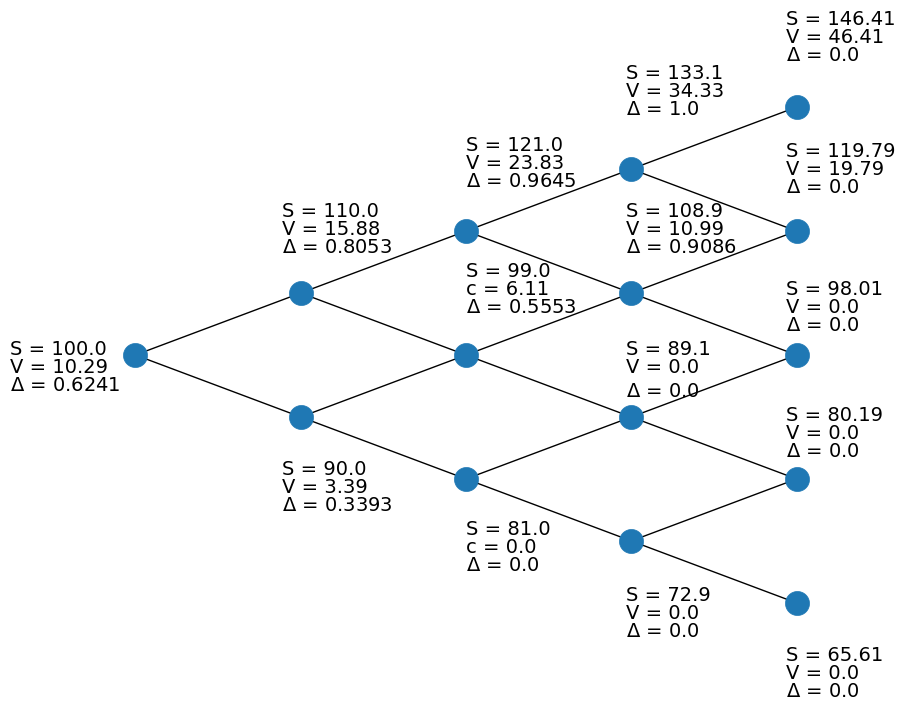

In [43]:
# Plot a 4-Step Binomial Tree
plot_binomial_tree(px[0,0], px, opx, d)